In [575]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
from sklearn import linear_model, datasets
from matplotlib import pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import datetime
from datetime import date

In [576]:
df = pd.read_csv('C:/Users/justi/Desktop/DataSets/kc_house_data_NaN.csv')
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [577]:
df.drop(columns=['Unnamed: 0','id'], axis = 1, inplace = True)
df.head(5)
print(df.dtypes)

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [578]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [579]:
##Changed date to make it datetime
df['date'] = pd.to_datetime(df['date'])
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [580]:
##Created a year column
df['year'] =  pd.DatetimeIndex(df['date']).year
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [581]:
##Moved year column next to date column
second_column = df.pop('year')
df.insert(1,'year',second_column)
df.head(5)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,2014,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,2014,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2015,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,2014,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,2015,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [582]:
df['weekday'] = df.date.dt.day_name()
df.sample(5)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,weekday
5848,2015-02-12,2015,572500.0,3.0,2.50,2490,7589,2.0,0,0,...,2490,0,1991,0,98056,47.5355,-122.179,2500,10386,Thursday
706,2015-04-13,2015,440000.0,3.0,1.75,1530,7245,1.0,0,0,...,1530,0,1984,0,98034,47.7310,-122.191,1530,7490,Monday
15987,2015-03-25,2015,436000.0,5.0,3.00,2720,9856,2.0,0,0,...,2720,0,1969,0,98059,47.4778,-122.146,1420,9685,Wednesday
1116,2014-06-23,2014,690000.0,2.0,1.00,970,4560,1.0,0,0,...,970,0,1907,0,98103,47.6561,-122.332,1500,4560,Monday
19831,2014-06-20,2014,925000.0,4.0,2.75,3730,8014,2.0,0,0,...,3730,0,2012,0,98074,47.6036,-122.059,3670,8279,Friday


In [583]:
third_column = df.pop('weekday')
df.insert(2,'weekday',third_column)
df.head(5)

,date,year,weekday,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,2014,Monday,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,2014,Tuesday,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2015,Wednesday,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,2014,Tuesday,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,2015,Wednesday,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [584]:
df['PricePerSqft'] = df['price']/df['sqft_living']
df.head()

,date,year,weekday,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,PricePerSqft
0,2014-10-13,2014,Monday,221900.0,3.0,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,2014-12-09,2014,Tuesday,538000.0,3.0,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521
2,2015-02-25,2015,Wednesday,180000.0,2.0,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234
3,2014-12-09,2014,Tuesday,604000.0,4.0,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265
4,2015-02-18,2015,Wednesday,510000.0,3.0,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429


In [585]:
fourth_column = df.pop('sqft_living')
df.insert(4,'sqft_living', fourth_column)
df.head(5)

,date,year,weekday,price,sqft_living,bedrooms,bathrooms,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,PricePerSqft
0,2014-10-13,2014,Monday,221900.0,1180,3.0,1.00,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,2014-12-09,2014,Tuesday,538000.0,2570,3.0,2.25,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521
2,2015-02-25,2015,Wednesday,180000.0,770,2.0,1.00,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234
3,2014-12-09,2014,Tuesday,604000.0,1960,4.0,3.00,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265
4,2015-02-18,2015,Wednesday,510000.0,1680,3.0,2.00,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429


In [586]:
fifth_column = df.pop('PricePerSqft')
df.insert(5,'PricePerSqft',fifth_column)
df.head(5)

,date,year,weekday,price,sqft_living,PricePerSqft,bedrooms,bathrooms,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,2014,Monday,221900.0,1180,188.050847,3.0,1.00,5650,1.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,2014,Tuesday,538000.0,2570,209.338521,3.0,2.25,7242,2.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2015,Wednesday,180000.0,770,233.766234,2.0,1.00,10000,1.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,2014,Tuesday,604000.0,1960,308.163265,4.0,3.00,5000,1.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,2015,Wednesday,510000.0,1680,303.571429,3.0,2.00,8080,1.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [587]:
##getting the number of values for the columns below
values = df[['year', 'bedrooms', 'bathrooms', 'floors','waterfront','view']]
for column in values.columns.tolist():
    print(column)
    print(values[column].value_counts())

year
2014    14633
2015     6980
Name: year, dtype: int64
bedrooms
3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64
waterfront
0    21450
1      163
Name: waterfront, dtype: int64
view
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


In [588]:
df.isnull().sum()

date              0
year              0
weekday           0
price             0
sqft_living       0
PricePerSqft      0
bedrooms         13
bathrooms        10
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [589]:
##gets the average number of bedrooms and bathrooms and replaces the null values with them
avg_bed = df['bedrooms'].mean()
avg_bath = df['bathrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace(np.nan,avg_bed)
df['bathrooms'] = df['bathrooms'].replace(np.nan,avg_bed)
df.isnull().sum()

date             0
year             0
weekday          0
price            0
sqft_living      0
PricePerSqft     0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [590]:
##gets a breakdown of the price
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [591]:
df.corr()

,year,price,sqft_living,PricePerSqft,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
year,1.000000,0.003576,-0.029038,0.045524,-0.009949,-0.026292,0.005468,-0.022315,-0.004165,0.001364,...,-0.030387,-0.023823,-0.015687,0.003507,-0.023707,0.001189,-0.029212,0.000270,-0.021734,-0.000085
price,0.003576,1.000000,0.702035,0.554703,0.308797,0.525223,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,-0.029038,0.702035,1.000000,-0.092314,0.578077,0.754540,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
PricePerSqft,0.045524,0.554703,-0.092314,1.000000,-0.206303,-0.090633,-0.033822,0.003840,0.193215,0.220932,...,0.122758,-0.088618,-0.025762,-0.289866,0.105483,0.172630,0.472049,-0.236032,0.038563,-0.057515
bedrooms,-0.009949,0.308797,0.578077,-0.206303,1.000000,0.513296,0.032307,0.178022,-0.006800,0.080058,...,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,-0.026292,0.525223,0.754540,-0.090633,0.513296,1.000000,0.087897,0.502180,0.063639,0.188388,...,0.663393,0.685746,0.282755,0.506605,0.050370,-0.205046,0.024012,0.225668,0.569018,0.087610
sqft_lot,0.005468,0.089661,0.172826,-0.033822,0.032307,0.087897,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,-0.022315,0.256794,0.353949,0.003840,0.178022,0.502180,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.004165,0.266369,0.103818,0.193215,-0.006800,0.063639,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.001364,0.397293,0.284611,0.220932,0.080058,0.188388,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


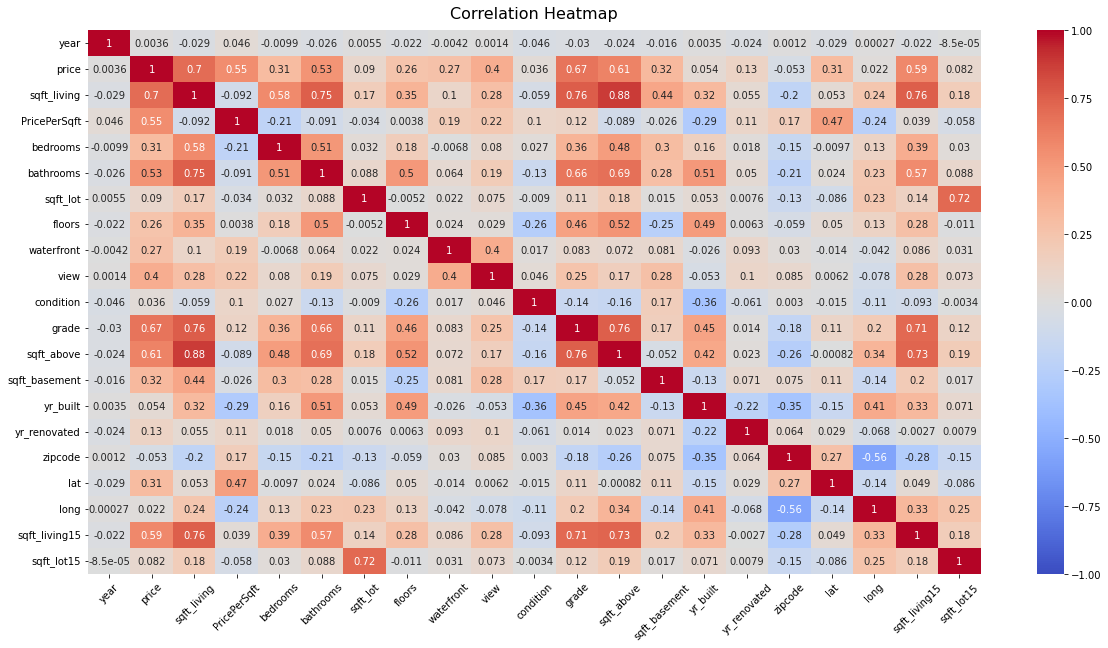

In [592]:
##correlation heatmap
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
heatmap = heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 45)

In [593]:
##deleted the outlier
df = df[df.bedrooms!= 33]
df['bedrooms'].max()

11.0

In [594]:
df.groupby(['weekday']).median()[['price','PricePerSqft']]

,price,PricePerSqft
weekday,,
Friday,455000.0,244.315341
Monday,453000.0,248.000000
Saturday,475000.0,269.677419
Sunday,471250.0,251.558685
Thursday,442500.0,243.387712
Tuesday,449950.0,244.444444
Wednesday,453000.0,242.939844


(0.0, 8081250.0)

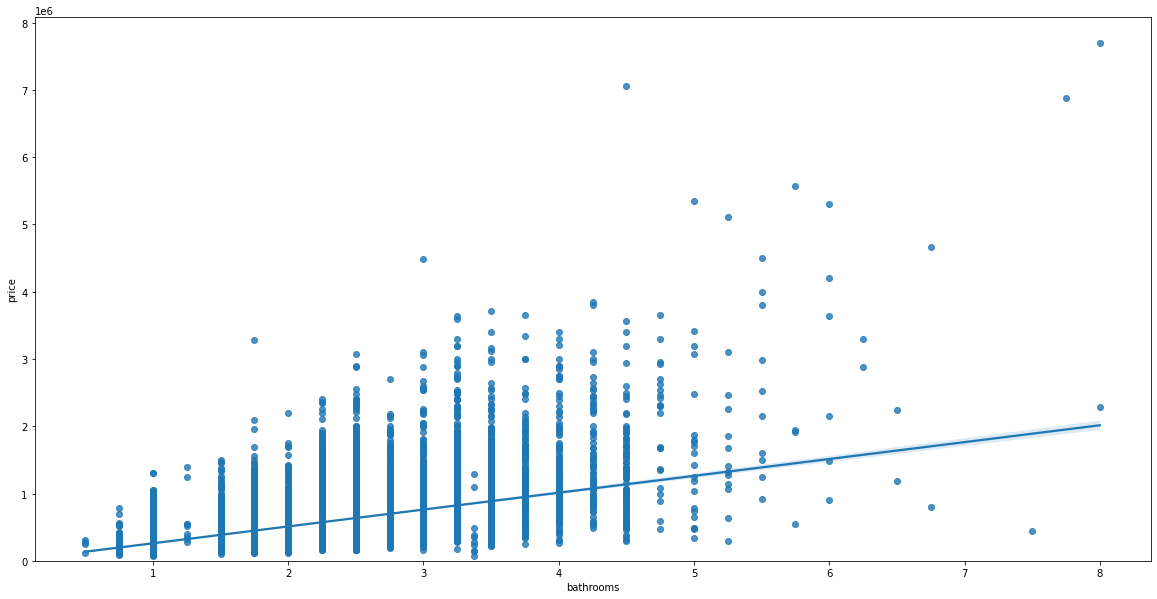

In [595]:
#regression plot
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.regplot(x = 'bathrooms', y = 'price', data = df,ax=ax)
plt.ylim(0,)

(0.0, 8081250.0)

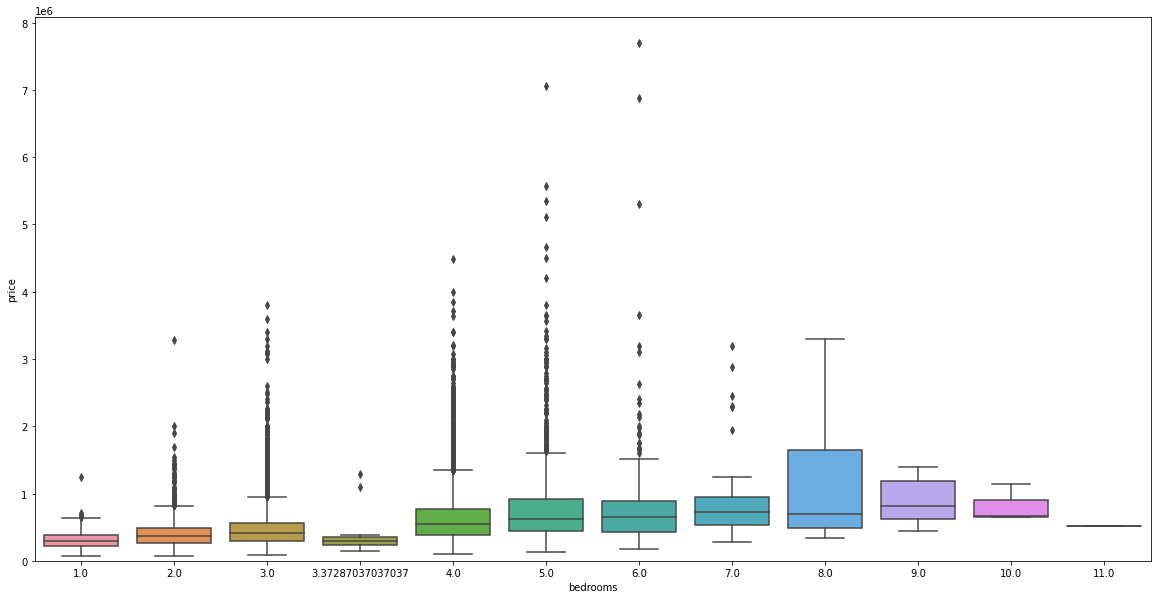

In [596]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.boxplot(x = 'bedrooms', y = 'price', data = df,ax=ax)
plt.ylim(0,)

In [597]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['bedrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3159623169242217  with a P-value of P = 0.0


In [598]:
pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.5252330741149646  with a P-value of P = 0.0


In [599]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7020466360937231  with a P-value of P = 0.0


In [600]:
pearson_coef, p_value = stats.pearsonr(df['grade'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6674472592985792  with a P-value of P = 0.0


In [601]:
listwanted = df[['bedrooms','bathrooms','sqft_living', 'waterfront', 'PricePerSqft']]
for i in listwanted.columns.tolist():
    pearson_coef, p_value = stats.pearsonr(listwanted[i], df['price'])
    print("The Pearson Correlation Coefficient of", i,"is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient of bedrooms is 0.3159623169242217 with a P-value of P = 0.0
The Pearson Correlation Coefficient of bathrooms is 0.5252330741149646 with a P-value of P = 0.0
The Pearson Correlation Coefficient of sqft_living is 0.7020466360937231 with a P-value of P = 0.0
The Pearson Correlation Coefficient of waterfront is 0.26637103503056136 with a P-value of P = 0.0
The Pearson Correlation Coefficient of PricePerSqft is 0.5547068541337417 with a P-value of P = 0.0


(0.0, 8084052.819558747)

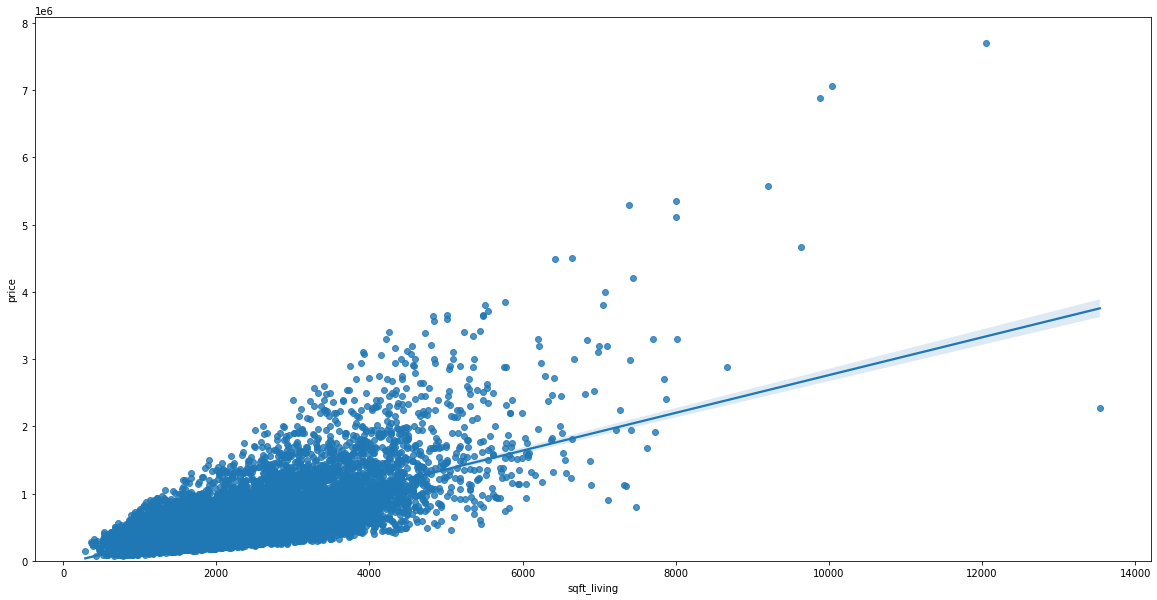

In [602]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.regplot(x = 'sqft_living', y = 'price', data = df,ax=ax)
plt.ylim(0,)

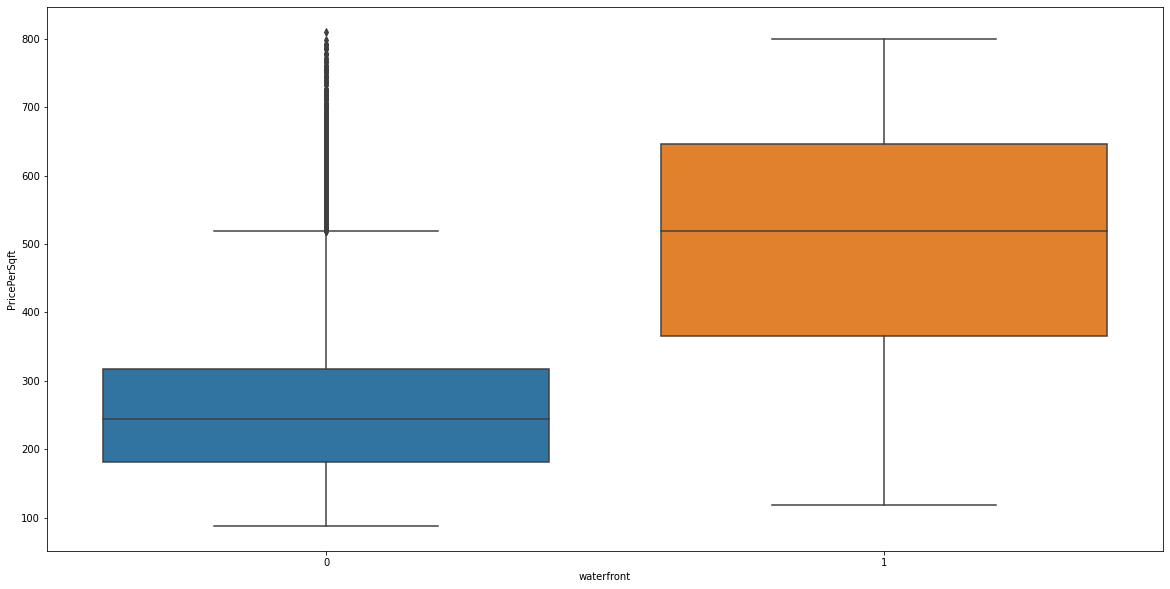

In [603]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
boxplot_w = sns.boxplot(x="waterfront",y="PricePerSqft", data=df, ax=ax)

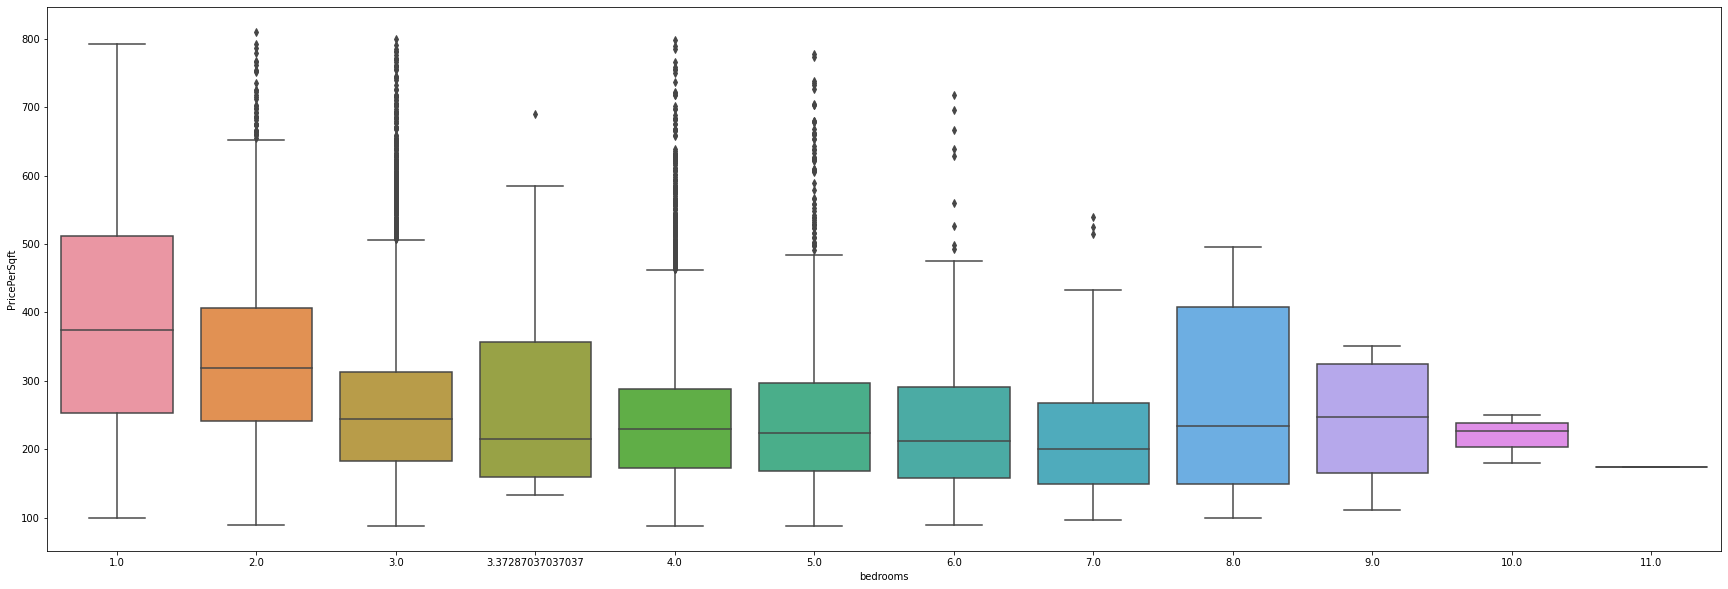

In [604]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
boxplot_w = sns.boxplot(x="bedrooms",y="PricePerSqft", data=df, ax=ax)

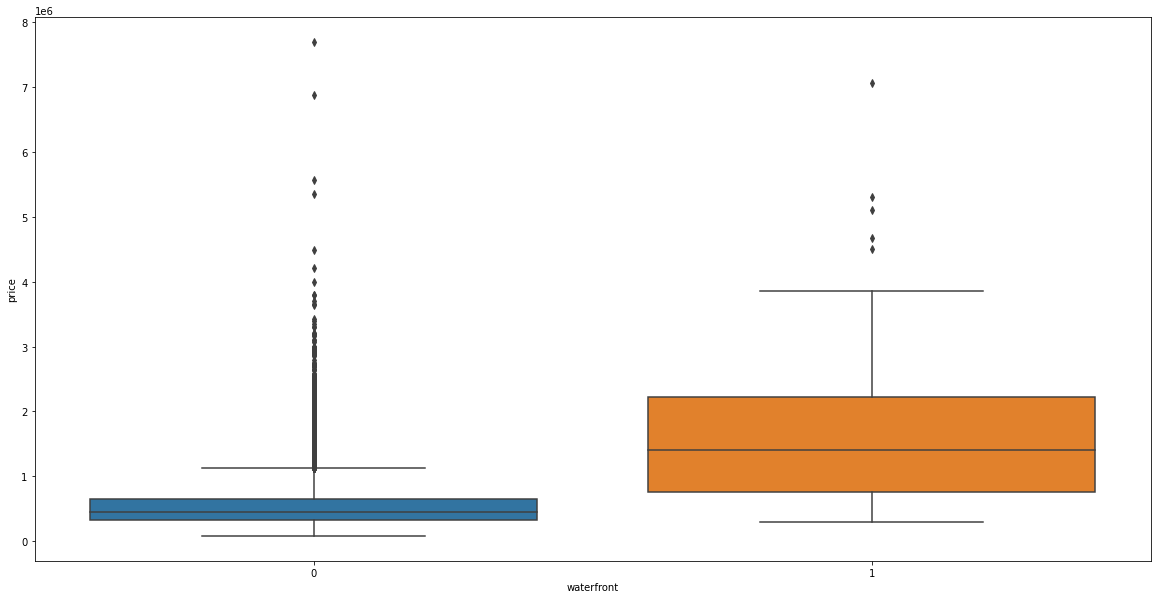

In [605]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
boxplot_w = sns.boxplot(x="waterfront",y="price", data=df, ax=ax)

C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


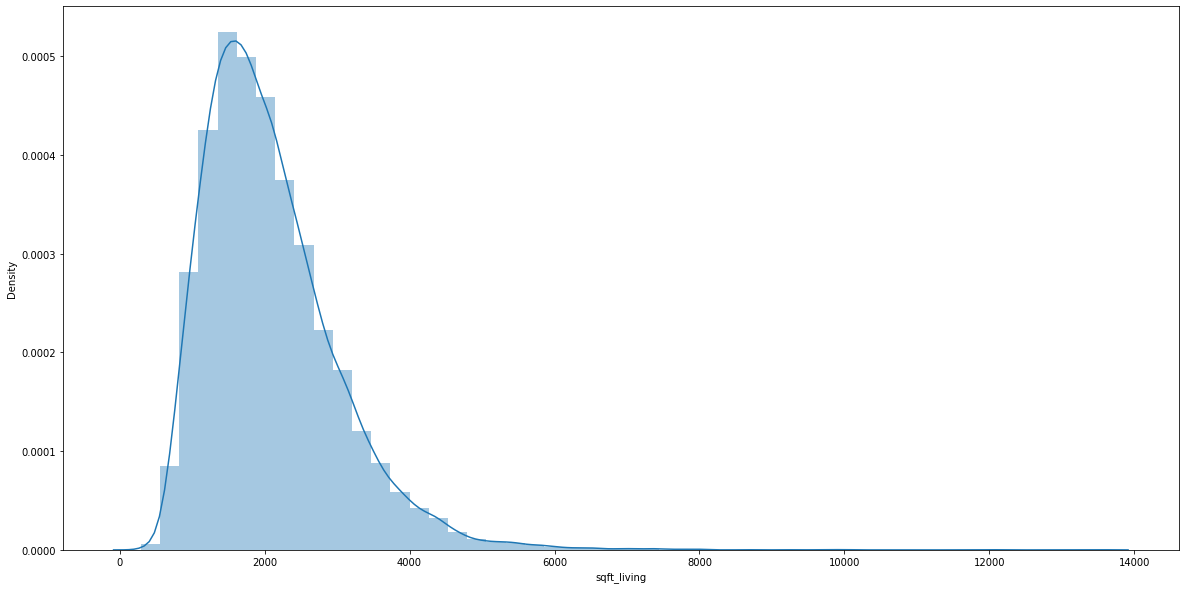

In [606]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
priceplot = sns.distplot(df['sqft_living'],ax=ax)

C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


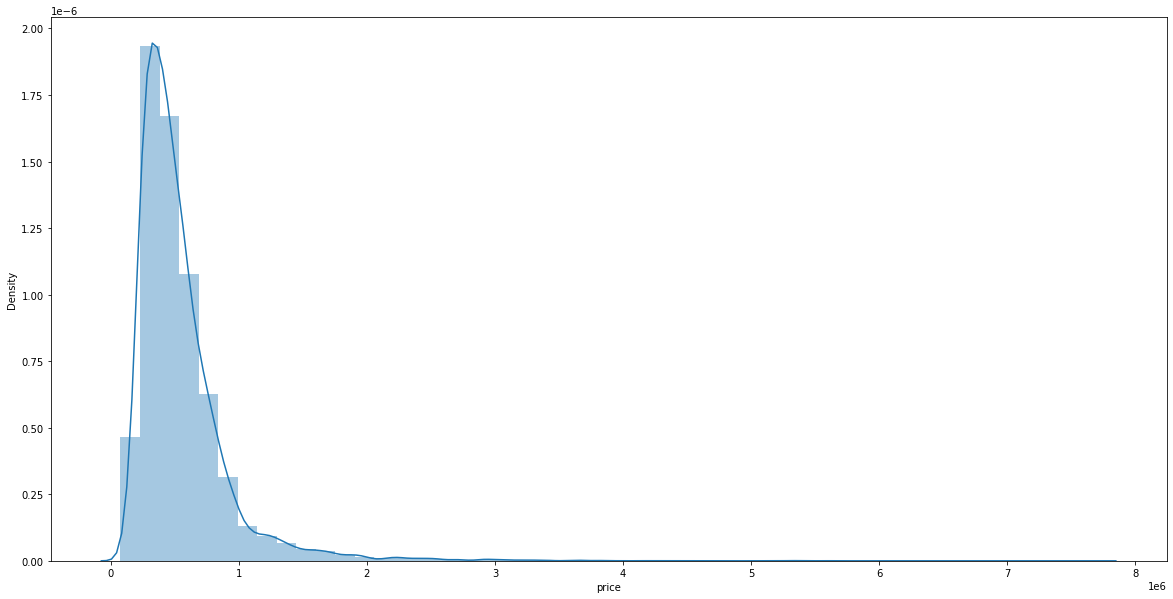

In [607]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
priceplot = sns.distplot(df['price'],ax=ax)

In [608]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [609]:
path = 'C:/Users/justi/Downloads/King County Metro Access - 2021 Sept - Weekday Service Area 0800-0900/geo_export_b40bd036-ef6f-4e99-a5fb-9352b1a0c294.shp'
street_map = gpd.read_file(path)

In [610]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

In [611]:
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

C:\Users\justi\Desktop\Python\lib\site-packages\geopandas\array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)


In [612]:
geo_df.head(5)

C:\Users\justi\Desktop\Python\lib\site-packages\geopandas\array.py:175: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return vectorized.to_shapely(geoms.data)
C:\Users\justi\Desktop\Python\lib\site-packages\geopandas\array.py:175: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return vectorized.to_shapely(geoms.data)


,date,year,weekday,price,sqft_living,PricePerSqft,bedrooms,bathrooms,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,2014-10-13,2014,Monday,221900.0,1180,188.050847,3.0,1.00,5650,1.0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,2014-12-09,2014,Tuesday,538000.0,2570,209.338521,3.0,2.25,7242,2.0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,2015-02-25,2015,Wednesday,180000.0,770,233.766234,2.0,1.00,10000,1.0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2014-12-09,2014,Tuesday,604000.0,1960,308.163265,4.0,3.00,5000,1.0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,2015-02-18,2015,Wednesday,510000.0,1680,303.571429,3.0,2.00,8080,1.0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


C:\Users\justi\Desktop\Python\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


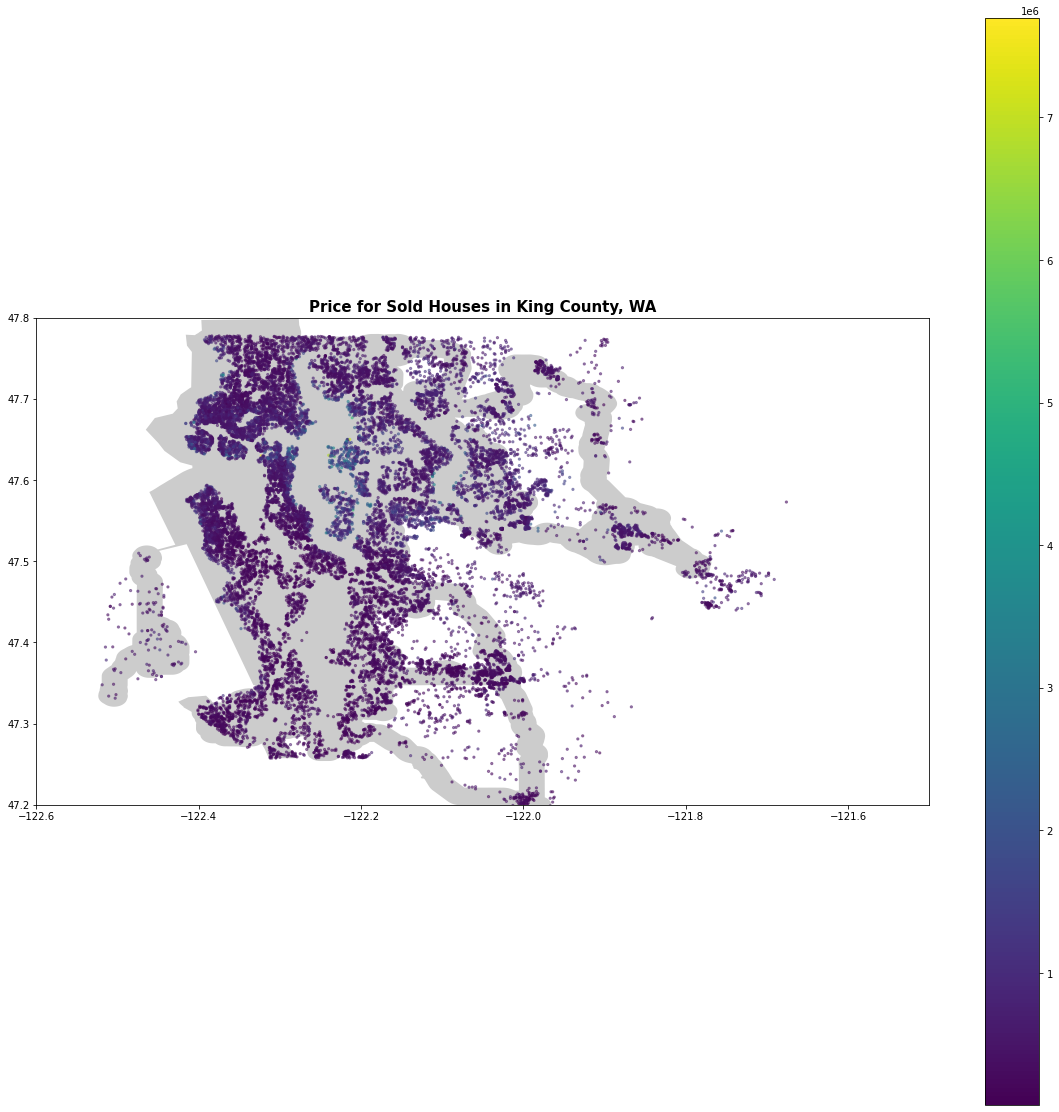

In [670]:
fig, ax = plt.subplots(figsize=(20,20))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=5)
plt.title('Price for Sold Houses in King County, WA', fontsize=15,fontweight='bold')
plt.xlim(-122.60,-121.50)
plt.ylim( 47.2,47.8)
plt.show()

In [723]:
x = df[['bedrooms','bathrooms','sqft_living','sqft_above','grade','PricePerSqft']]
y= df['price']

In [729]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [730]:
#Without Training The Model
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)

0.8806509133635728

In [731]:
yhat = lm.predict(x)

C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


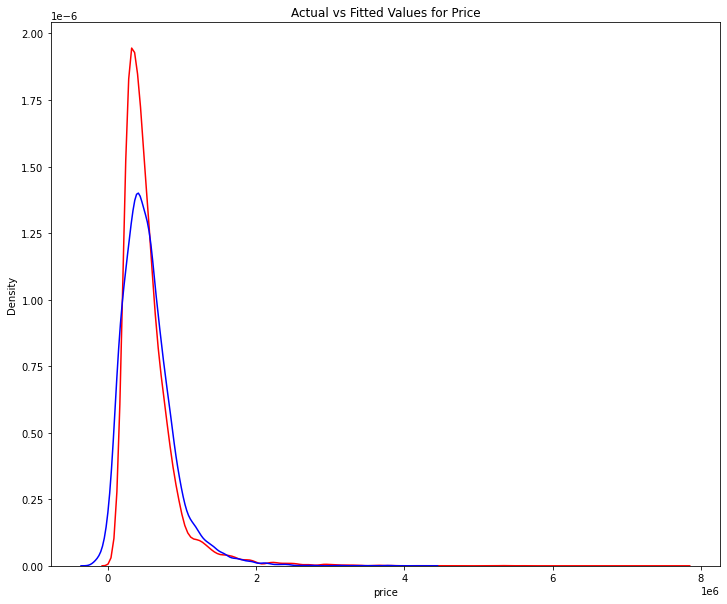

In [732]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

In [733]:
##Training the model
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8981070970426757

In [734]:
result = sm.OLS(y,x).fit()
print(result.summary())
import statsmodels.api as sm

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                          6.643e+04
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                        0.00
Time:                        08:24:26   Log-Likelihood:                     -2.8797e+05
No. Observations:               21612   AIC:                                  5.759e+05
Df Residuals:                   21606   BIC:                                  5.760e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [701]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [702]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

6.0072481706344895e-09
1.0


In [743]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)

Ridge(alpha=0.1)

In [744]:
RidgeModel.score(x_test,y_test)

0.8981070935234493

In [746]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['bedrooms','bathrooms','sqft_living','sqft_above','grade','PricePerSqft']])
x_test_pr=pr.fit_transform(x_test[['bedrooms','bathrooms','sqft_living','sqft_above','grade','PricePerSqft']])

In [747]:
RidgeModel=Ridge(alpha=0.1)

In [748]:
RidgeModel.fit(x_train_pr, y_train)

C:\Users\justi\Desktop\Python\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.0062e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=0.1)

In [754]:
RidgeModel.score(x_test_pr,y_test)

1.0

In [751]:
yhat1 = RidgeModel.predict(x_test_pr)

C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


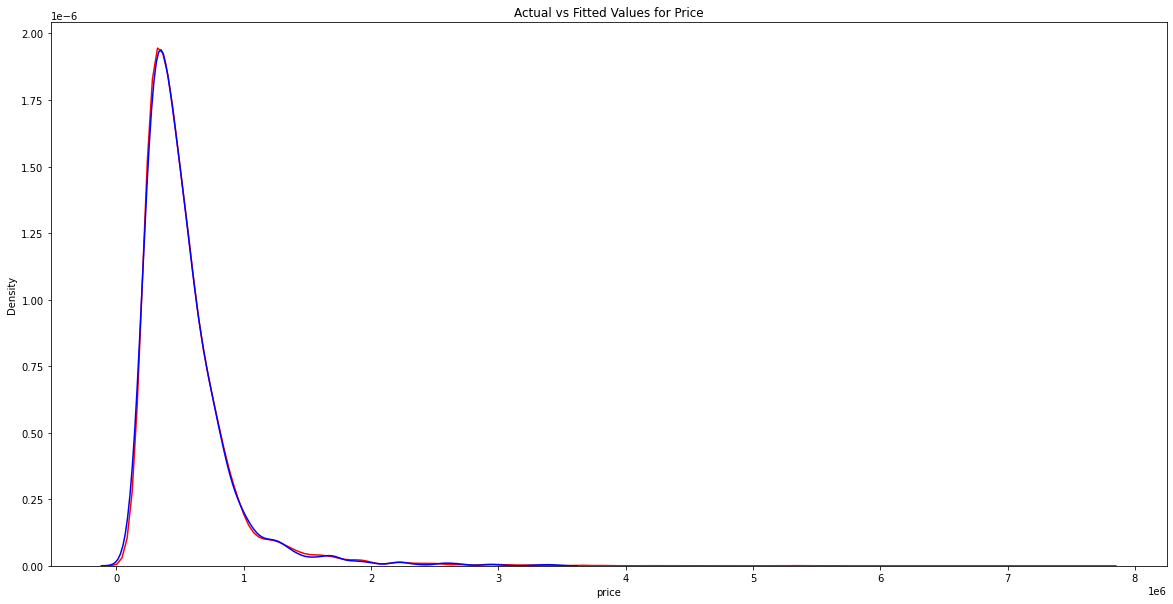

In [753]:
width = 20
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

In [ ]:
df.columns

Index(['date', 'year', 'weekday', 'price', 'sqft_living', 'PricePerSqft',
       'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'geometry'],
      dtype='object')

In [545]:
import MySQLdb
## Creates connection with Database
conn= MySQLdb.connect(host='localhost', port = 3306, db='justin', user='root') 
cursor = conn.cursor()

In [547]:
## Creates a table
cursor.execute("CREATE TABLE Housing_Prices (date_ date, year_ year, weekday varchar(30),  price float(20,5), sqft_living int(20), PricePerSqft float(20,15),  bedrooms float(20,5),  bathrooms float(20,5), sqft_lot int(20), floors float, waterfront int(20), view_ int(20), condition_ int(20), grade int(20), sqft_above int(20), sqft_basement int(20), yr_built int(20), yr_renovated int(20), zipcode int(20), lat float(20,5), long_ float(20,5), sqft_living15 int(20), sqft_lot15 int(20))")

0

In [548]:
df.rename(columns={"date":"date_", "year":"year_"}, inplace = True)

In [549]:
df.rename(columns={"long":"long_"}, inplace = True)

In [550]:
df.rename(columns={"condition":"condition_"},inplace = True)

In [551]:
df.rename(columns = {"view":"view_"}, inplace = True)

In [552]:
##Uploads dataframe to SQL database
for index,row in df.iterrows():
    cursor.execute("Insert into Housing_Prices (date_, year_, weekday, price, sqft_living, PricePerSqft, bedrooms,  bathrooms,  sqft_lot, floors, waterfront, view_, condition_, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long_, sqft_living15, sqft_lot15) values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)", [row['date_'],row['year_'],row['weekday'],row['price'],row['sqft_living'], row['PricePerSqft'], row['bedrooms'],row['bathrooms'],row['sqft_lot'],row['floors'],row['waterfront'],row['view_'],row['condition_'],row['grade'],row['sqft_above'],row['sqft_basement'],row['yr_built'],row['yr_renovated'],row['zipcode'],row['lat'],row['long_'],row['sqft_living15'],row['sqft_lot15']])
    conn.commit()
cursor.close()
conn .close()